## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_shape=10, nero_nums = [128,256,32,64]):
    """Code Here
    建立你的神經網路
    """
    input_layers = keras.layers.Input(input_shape)
    
    for i, nero_num in enumerate(nero_nums):
        if i == 0:
            x = keras.layers.Dense(units = nero_num, activation='relu', name="hidden_layer"+str(i+1))(input_layers)
        else:
            x = keras.layers.Dense(units = nero_num, activation='relu', name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units = output_shape, activation='softmax')(x)
    model = keras.models.Model(inputs = [input_layers], outputs=[out])    
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [29]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
def start_train(isNesterov):
    results = {}
    for lr in LEARNING_RATE:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print("Experiment with LR = %.6f" % (lr))
            model = build_mlp(x_train.shape[1:])
            model.summary()
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=isNesterov, momentum=MOMENTUM)
            model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer = optimizer)
            model.fit(x_train, y_train, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(x_test, y_test), 
                      shuffle=True)

            train_loss = model.history.history['loss']
            valid_loss = model.history.history['val_loss']
            train_acc = model.history.history['acc']
            valid_acc = model.history.history["val_acc"]

            exp_name_tag = "exp-lr-%s" % str(lr)
            results[exp_name_tag] = {
                'train_loss':train_loss,
                'valid_loss':valid_loss,
                'train_acc':train_acc,
                'valid_acc':valid_acc
            }
    return results;

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

def show_history(results, title):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])

    plt.title("Loss : " + title)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'],'-', label=cond, color =color_bar[i])
        plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'],'--', label=cond, color =color_bar[i])
    
    plt.title('Accuracy: '+ title)
    plt.legend()
    plt.show()

## Nesterov

In [32]:
nesterov_result_historys = start_train(isNesterov = True)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                8224      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 437,354
Trainable params: 437,354
Non-trainable params: 0
________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9446 - acc: 0.2923 - val_loss: 1.8667 - val_acc: 0.3282
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6860 - acc: 0.3957 - val_loss: 1.6523 - val_acc: 0.4030
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5820 - acc: 0.4338 - val_loss: 1.5508 - val_acc: 0.4472
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5158 - acc: 0.4595 - val_loss: 1.5078 - val_acc: 0.4575
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4648 - acc: 0.4790 - val_loss: 1.5256 - val_acc: 0.4573
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4249 - acc: 0.4904 - val_loss: 1.4967 - val_acc: 0.4638
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3884 - acc: 0.5058 - val_loss: 1.5180 - val_acc

50000/50000 [==============================] - 3s 66us/step - loss: 2.1562 - acc: 0.2059 - val_loss: 2.0053 - val_acc: 0.2730
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.9292 - acc: 0.3143 - val_loss: 1.8605 - val_acc: 0.3381
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8274 - acc: 0.3504 - val_loss: 1.7903 - val_acc: 0.3652
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7687 - acc: 0.3732 - val_loss: 1.7630 - val_acc: 0.3729
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7219 - acc: 0.3893 - val_loss: 1.6979 - val_acc: 0.3936
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6798 - acc: 0.4056 - val_loss: 1.6601 - val_acc: 0.4102
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6402 - acc: 0.4196 - val_loss: 1.6263 - val_acc: 0.4203
Epoch 8/50
50000/50000 [============================

Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2649 - acc: 0.1325 - val_loss: 2.2474 - val_acc: 0.1437
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2298 - acc: 0.1544 - val_loss: 2.2081 - val_acc: 0.1791
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1853 - acc: 0.1913 - val_loss: 2.1584 - val_acc: 0.2177
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1322 - acc: 0.2315 - val_loss: 2.1025 - val_acc: 0.2502
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0786 - acc: 0.2539 - val_loss: 2.0521 - val_acc: 0.2664
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0347 - acc: 0.2659 - val_loss: 2.0144 - val_acc: 0.2747
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0009 - acc: 0.2765 - val_loss: 1.9855 - val_acc: 0.2842
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 63us/step - loss: 2.3200 - acc: 0.0860 - val_loss: 2.3162 - val_acc: 0.0843
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3132 - acc: 0.0889 - val_loss: 2.3103 - val_acc: 0.0850
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3085 - acc: 0.0886 - val_loss: 2.3061 - val_acc: 0.0857
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3051 - acc: 0.0891 - val_loss: 2.3030 - val_acc: 0.0860
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3025 - acc: 0.0940 - val_loss: 2.3005 - val_acc: 0.0967
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3002 - acc: 0.1022 - val_loss: 2.2982 - val_acc: 0.1062
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.2982 - acc: 0.1090 - val_loss: 2.2963 - val_acc: 0.1143
Epoch 9/50
50000/50000 [============================

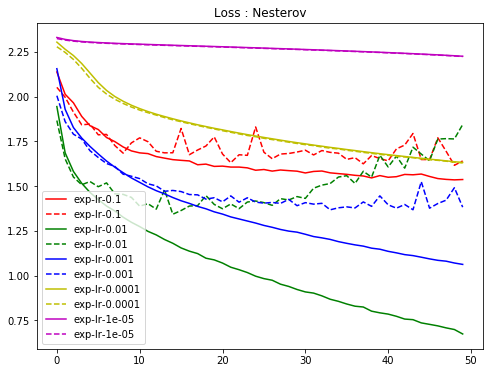

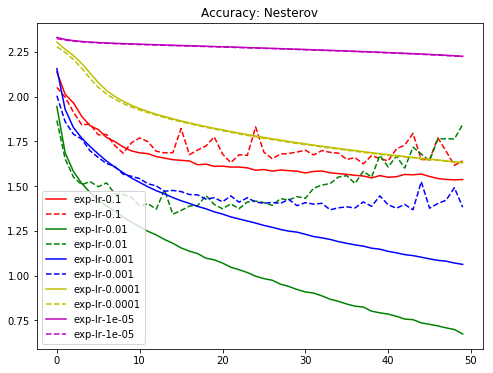

In [43]:
show_history(nesterov_result_historys, 'Nesterov')

In [44]:
result_historys = start_train(isNesterov = False)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                8224      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 437,354
Trainable params: 437,354
Non-trainable params: 0
________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0136 - acc: 0.2582 - val_loss: 1.8174 - val_acc: 0.3416
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7248 - acc: 0.3775 - val_loss: 1.6706 - val_acc: 0.3942
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6473 - acc: 0.4085 - val_loss: 1.6872 - val_acc: 0.3979
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5895 - acc: 0.4287 - val_loss: 1.5527 - val_acc: 0.4440
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5510 - acc: 0.4433 - val_loss: 1.5227 - val_acc: 0.4527
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5002 - acc: 0.4621 - val_loss: 1.4721 - val_acc: 0.4727
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4671 - acc: 0.4741 - val_loss: 1.5287 - val_acc

50000/50000 [==============================] - 3s 67us/step - loss: 2.2262 - acc: 0.1740 - val_loss: 2.0909 - val_acc: 0.2477
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9770 - acc: 0.2875 - val_loss: 1.9014 - val_acc: 0.3186
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8669 - acc: 0.3337 - val_loss: 1.8308 - val_acc: 0.3495
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8005 - acc: 0.3571 - val_loss: 1.7613 - val_acc: 0.3740
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7473 - acc: 0.3772 - val_loss: 1.7115 - val_acc: 0.3910
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7028 - acc: 0.3914 - val_loss: 1.6925 - val_acc: 0.3986
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6658 - acc: 0.4055 - val_loss: 1.6710 - val_acc: 0.3966
Epoch 8/50
50000/50000 [============================

Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2624 - acc: 0.1888 - val_loss: 2.2487 - val_acc: 0.1908
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.2314 - acc: 0.2086 - val_loss: 2.2150 - val_acc: 0.2107
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.1940 - acc: 0.2253 - val_loss: 2.1749 - val_acc: 0.2248
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.1512 - acc: 0.2344 - val_loss: 2.1315 - val_acc: 0.2364
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1081 - acc: 0.2476 - val_loss: 2.0905 - val_acc: 0.2533
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0690 - acc: 0.2604 - val_loss: 2.0547 - val_acc: 0.2697
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.0355 - acc: 0.2708 - val_loss: 2.0238 - val_acc: 0.2786
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 62us/step - loss: 2.3089 - acc: 0.0982 - val_loss: 2.3055 - val_acc: 0.1058
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3041 - acc: 0.1095 - val_loss: 2.3014 - val_acc: 0.1160
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3006 - acc: 0.1187 - val_loss: 2.2983 - val_acc: 0.1214
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2978 - acc: 0.1260 - val_loss: 2.2957 - val_acc: 0.1304
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2954 - acc: 0.1316 - val_loss: 2.2933 - val_acc: 0.1395
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2930 - acc: 0.1386 - val_loss: 2.2909 - val_acc: 0.1462
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2906 - acc: 0.1435 - val_loss: 2.2884 - val_acc: 0.1514
Epoch 9/50
50000/50000 [============================

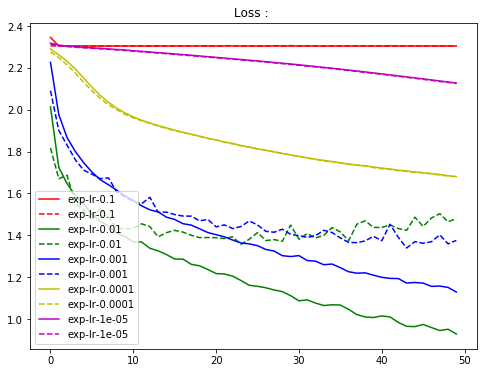

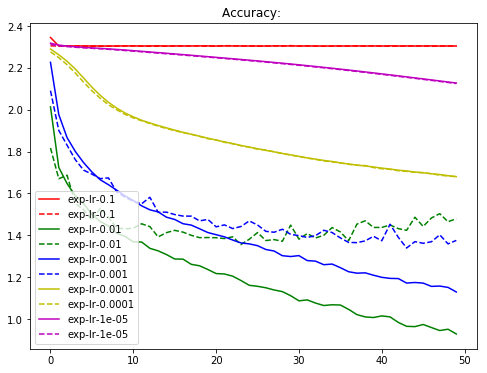

In [45]:
show_history(result_historys, '')